# Geospatial Analysis : Zomato Case Study 

### Understanding the problem statement: 

In [1]:
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
con = sqlite3.connect(r"/Users/ojas/Downloads/Zomato Data analysis /Resources/zomato_rawdata.sqlite")


In [3]:
df = pd.read_sql_query("SELECT * FROM users", con)


In [4]:
df.shape


(51717, 18)

In [5]:
df.columns


Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Dealing with missing values 


In [6]:
df.isnull().sum()


index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100


index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

- as we noticed around 50% of data will be lost if we delete the NaN values in dished_liked column. we will keep that column for now.
- Let us check for rate column as it contains 15% of its points as null value which is one of the most important feature.



In [8]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

-  So lets replace "NEW" and '-' with np.nan or with "missing value" so that we can fill later it with some values.



In [9]:
df["rate"].replace(("NEW" , "-"), np.nan, inplace = True)


In [10]:
df["rate"].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#### We need rating as 4.1 not as 4.1/5. So, we have to fix it

In [11]:
"4.1/5".split('/')[0]


'4.1'

In [12]:
type("4.1/5".split('/')[0])


str

In [13]:
float("4.1/5".split('/')[0])


4.1

In [14]:
df["rate"] = df['rate'].apply(lambda x : float( x.split('/')[0]) if type(x)== str else x)


In [15]:
df["rate"]


0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

## Is there relation between online order and rating of the restaurents


- How many restaurents that have rating 0,1,1.2,1.4,1.6 --- and that accepts online order and do not accept order.
- For such problem statement, we will create frequency tables.


In [16]:
x = pd.crosstab(df['rate'], df['online_order'])


In [17]:
print(x)


online_order    No   Yes
rate                    
1.8              5     0
2.0             11     0
2.1              9    15
2.2             10    16
2.3             29    22
2.4             36    34
2.5             38    63
2.6             83   177
2.7            141   166
2.8            224   376
2.9            314   488
3.0            439   584
3.1            587   974
3.2            829  1044
3.3           1137  1173
3.4           1024  1452
3.5           1090  1694
3.6           1090  2226
3.7           1172  2649
3.8           1147  2726
3.9           1017  2955
4.0            874  2309
4.1            843  2105
4.2            648  1536
4.3            692  1001
4.4            374   773
4.5            297   359
4.6            140   160
4.7            113    54
4.8             34    32
4.9             12    43


## Lets modify above visual and get better results and/interference

#### Is there any relation b/w online order option and rating restaurents

In [18]:
x = pd.crosstab(df["rate"], df["online_order"])

In [19]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

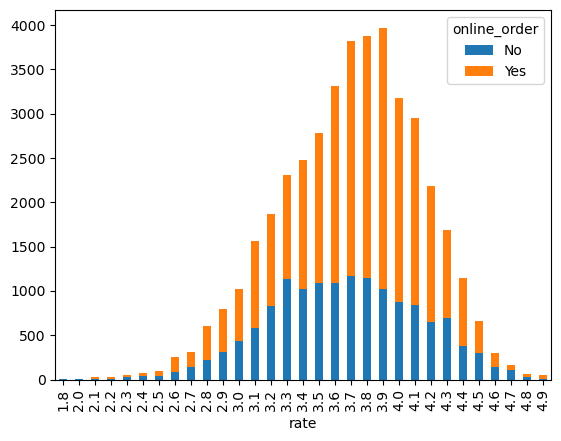

In [20]:
x.plot(kind = "bar",stacked = True)

In [21]:
#convert into 100% bar chart

In [22]:
x.sum(axis = 1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [23]:
normalize_df = x.div(x.sum(axis = 1).astype(float), axis = 0)

In [24]:
normalize_df

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
2.4,0.514286,0.485714
2.5,0.376238,0.623762
2.6,0.319231,0.680769
2.7,0.459283,0.540717


<Axes: xlabel='rate'>

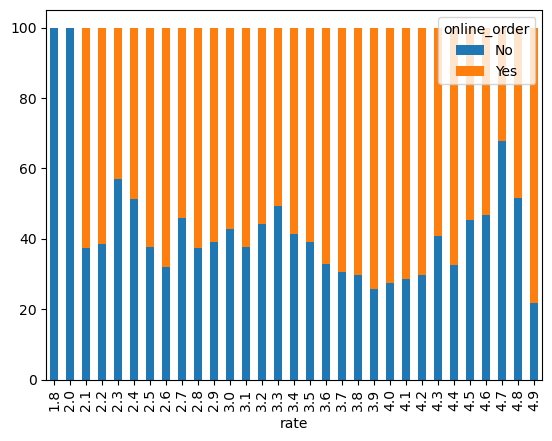

In [25]:
(normalize_df*100).plot(kind="bar", stacked= True)

## Performing Text Cleaning analysis based on review feature

In [26]:
df["rest_type"].isnull().sum() 

227

In [27]:
data = df.dropna(subset = ["rest_type"])
data["rest_type"].isnull().sum()

0

In [28]:
data["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [29]:
quick_bites_df = data[data["rest_type"].str.contains("Quick Bites")]

In [30]:
quick_bites_df

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari
26,26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200,"[('Rated 5.0', 'RATED\n please provide some e...",[],Cafes,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2,4,None,Brookefield,Quick Bites,None,"Andhra, Chinese, South Indian",None,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield
51642,51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,None,South Indian,200,[],[],Dine-out,Whitefield
51643,51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,+91 9443087893,Brookefield,Quick Bites,None,"Biryani, Kebab",300,[],[],Dine-out,Whitefield
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400,[],[],Dine-out,Whitefield


In [31]:
quick_bites_df.shape

(20639, 18)

In [32]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [33]:
quick_bites_df["reviews_list"].apply(lambda x:x.lower())

3        [('rated 4.0', "rated\n  great food and proper...
23       [('rated 4.0', "rated\n  so, went here with fr...
26       [('rated 5.0', 'rated\n  please provide some e...
31       [('rated 1.0', "rated\n  worst restaurant ever...
34       [('rated 3.0', 'rated\n  not worth for the mon...
                               ...                        
51641    [('rated 2.0', "rated\n  food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('rated 5.0', "rated\n  i was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [34]:
from nltk.corpus import RegexpTokenizer

In [35]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [36]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [37]:
tokenizer.tokenize(quick_bites_df["reviews_list"][3])

['Rated',
 'RATED',
 'n',
 'Great',
 'food',
 'and',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'Rated',
 'RATED',
 'n',
 'Reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'Saturday',
 'Half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'What',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'The',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'Only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'There',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'The',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'Had',
 'to',
 'call',
 'them',
 'repeatedly',
 'Rated',
 'RATED',
 'n',
 'Had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [38]:
sample = data[0:10000]

In [39]:
review_tokens = sample["reviews_list"].apply(tokenizer.tokenize)

In [40]:
review_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

### Performing Unigarm Analysis on the data and removal of stopwords 

#### Stopwords - Those words that doesnot make any sense in my analysis

In [41]:
review_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [42]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [43]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/ojas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
from nltk.corpus import stopwords

In [45]:
stop = stopwords.words("english")

In [46]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
stop.extend(["rated","n","nan","Rated","RATED"])

In [48]:
review_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [49]:
rev3 = review_tokens[3]

In [50]:
rev3

['Rated',
 'RATED',
 'n',
 'Great',
 'food',
 'and',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'Rated',
 'RATED',
 'n',
 'Reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'Saturday',
 'Half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'What',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'The',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'Only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'There',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'The',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'Had',
 'to',
 'call',
 'them',
 'repeatedly',
 'Rated',
 'RATED',
 'n',
 'Had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [51]:
print([token for token in rev3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [52]:
review_tokens_clean = review_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

In [53]:
review_tokens_clean

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
10046    [A, simplistic, joy, local, biryani, lovers, n...
10047                                               [Good]
10048    [Vry, gud, taste, something, different, must, ...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

##### Unigram analysis 

In [54]:
total_reviews_1D = []
total_reviews_2D = list(review_tokens_clean)
for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [55]:
total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [56]:
from nltk import FreqDist

In [57]:
fd = FreqDist()
for word in total_reviews_1D:
    fd[word] = fd[word]+1

In [58]:
fd.most_common(20) # this is for top 20 keywords

[('x', 162343),
 ('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355)]

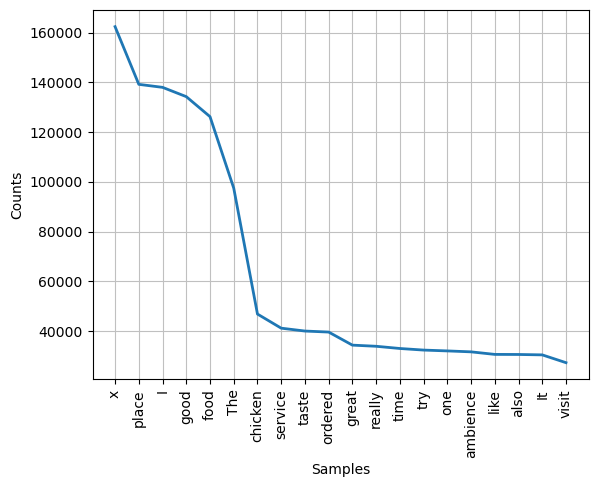

<Axes: xlabel='Samples', ylabel='Counts'>

In [59]:
fd.plot(20)

###### Performing Bi-gram and Tri-gram analysis on the data 

- Bigrams - It is a collection of 2 words 
- Trigrams - It is a collection of 3 words.

In [60]:
from nltk import FreqDist,bigrams,trigrams 

In [61]:
bi_grams = bigrams(total_reviews_1D)

In [62]:
bi_grams

<generator object bigrams at 0x2cde1d700>

In [63]:
# getting bigram frequency distribution

In [64]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [65]:
fd_bigrams.most_common(20)

[(('x', 'x'), 140329),
 (('The', 'food'), 10497),
 (('I', 'ordered'), 10132),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7215),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6811),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4439),
 (('good', 'I'), 4137)]

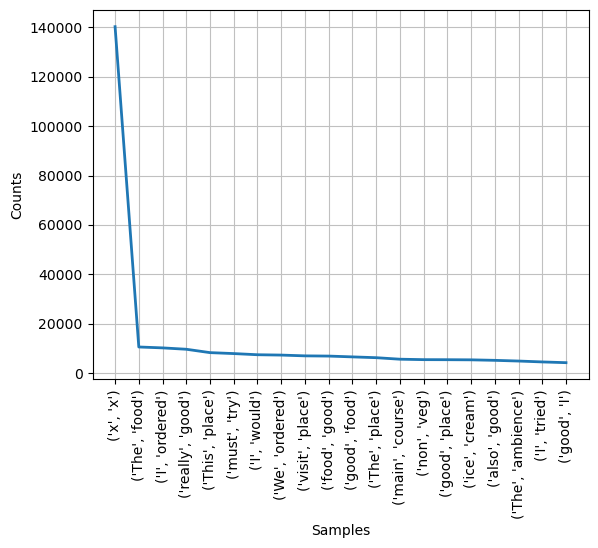

<Axes: xlabel='Samples', ylabel='Counts'>

In [66]:
fd_bigrams.plot(20)

In [67]:
fd_bigrams.most_common(100)

[(('x', 'x'), 140329),
 (('The', 'food'), 10497),
 (('I', 'ordered'), 10132),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7215),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6811),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4439),
 (('good', 'I'), 4137),
 (('good', 'The'), 4077),
 (('food', 'I'), 3992),
 (('place', 'I'), 3896),
 (('The', 'service'), 3830),
 (('one', 'best'), 3711),
 (('must', 'visit'), 3658),
 (('quality', 'food'), 3510),
 (('I', 'love'), 3494),
 (('nWe', 'ordered'), 3482),
 (('time', 'I'), 3398),
 (('nice', 'place'), 3290),
 (('The', 'staff'), 3286),
 (('pretty', 'good'), 3270),
 (('taste', 'good'), 3266),
 (('fried', 'rice'), 3127),
 (('pocket', 'friendly'), 3097),
 (('place', 'good'), 30

#### Trigram Analysis :

In [68]:
tri_grams = trigrams(total_reviews_1D)

In [69]:
fd_trigrams = FreqDist()

In [70]:
for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram]+1

In [71]:
fd_trigrams.most_common(50)

[(('x', 'x', 'x'), 119315),
 (('I', 'x', 'x'), 2318),
 (('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('It', 'x', 'x'), 1428),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1052),
 (('I', 'would', 'say'), 979),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 886),
 (('nFood', 'nAmbience', 'nService'), 845),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 751),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 675),
 (('x', 'f', 'x'), 637),
 (('I', 'would', 'like'), 619),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 603),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582),
 (('first', 'time', 'I'), 570),
 (('The', 'best', 'part'), 561),
 (('The', 'food', 'really'), 559),
 (('The', 'staff', 'friendly'), 559),
 (('Overall', 'good', 'experience'), 557),

### Extraction of Geographical Cordinates from the data.

In [72]:
!pip install geocoder
!pip install geopy

In [73]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [74]:
len(df['location'].unique())

94

In [75]:
df['location']+"Bangalore,Karnataka,India"

0                    BanashankariBangalore,Karnataka,India
1                    BanashankariBangalore,Karnataka,India
2                    BanashankariBangalore,Karnataka,India
3                    BanashankariBangalore,Karnataka,India
4                    BasavanagudiBangalore,Karnataka,India
                               ...                        
51712                  WhitefieldBangalore,Karnataka,India
51713                  WhitefieldBangalore,Karnataka,India
51714                  WhitefieldBangalore,Karnataka,India
51715    ITPL Main Road, WhitefieldBangalore,Karnataka,...
51716    ITPL Main Road, WhitefieldBangalore,Karnataka,...
Name: location, Length: 51717, dtype: object

In [76]:
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [77]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [78]:
df_copy = df.copy()

In [79]:
df_copy['location'].isnull().sum()

21

In [80]:
df_copy = df_copy.dropna(subset=['location'])

In [81]:
df_copy['location'].isnull().sum()

0

In [82]:
locations = pd.DataFrame(df_copy['location'].unique())

In [83]:
locations.columns = ['name']

In [84]:
locations

,name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout
...,...
88,West Bangalore
89,Magadi Road
90,Yelahanka
91,Sahakara Nagar


### Extracting Geographical Cordinates 

In [85]:
from geopy.geocoders import Nominatim

In [86]:
geolocator = Nominatim(user_agent = "app",timeout = None)

In [87]:
lat = []
lon = []

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

locations['latitude'] = lat
locations['longitude'] = lon

In [88]:
locations

,name,latitude,longitude
0,Banashankari,15.887678,75.704678
1,Basavanagudi,13.834591,75.733936
2,Mysore Road,12.946662,77.530090
3,Jayanagar,27.349301,95.315941
4,Kumaraswamy Layout,12.908149,77.555318
...,...,...,...
88,West Bangalore,13.009476,77.553089
89,Magadi Road,12.975653,77.555355
90,Yelahanka,13.100698,77.596345
91,Sahakara Nagar,18.490080,73.847530


## Performing Spatial Analysis 
-  we have to create heat maps 

In [91]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [92]:
locations.isnull().sum()

name         0
latitude     1
longitude    1
dtype: int64

In [93]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
79,Rammurthy Nagar,NaN,NaN


In [94]:
locations['latitude'][79] = 13.01556
locations['longitude'][79] = 77.67729

In [95]:
df['cuisines'].isnull().sum()

45

In [96]:
df = df.dropna(subset=['cuisines'])

In [97]:
north_india = df[df['cuisines'].str.contains('North Indian')]

In [98]:
north_india.shape
north_india.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [100]:
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns={'index':'name','location':'count'})

In [101]:
heatmap_df = north_india_rest_count.merge(locations,on = 'name',how = 'left')

In [102]:
heatmap_df

,name,count,latitude,longitude
0,BTM,2469,12.911276,77.604565
1,HSR,1123,29.152347,75.724580
2,Whitefield,1059,53.553368,-2.296902
3,Marathahalli,1038,12.955257,77.698416
4,JP Nagar,958,12.909694,77.586607
...,...,...,...,...
85,Hebbal,4,13.038218,77.591900
86,Jakkur,3,13.078474,77.606894
87,Central Bangalore,2,12.989899,77.571735
88,West Bangalore,1,13.009476,77.553089


In [104]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/17/ce/14166d0e273d12065516625fb02426350298e7b4ba59198b5fe454b46202/branca-0.7.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 709.3 kB/s eta 0:00:00a 0:00:01


In [105]:
import folium 

In [106]:
basemap = folium.Map()

In [107]:
basemap

In [110]:
heatmap_df.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [112]:
from folium.plugins import HeatMap

In [114]:
HeatMap(heatmap_df[['latitude','longitude','count']]).add_to(basemap)

In [115]:
basemap

### Automate the Data Analysis : Performing Automation 

In [116]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={'index':'name' , "location":"count"})
    heatmap_df = cuisine_rest_count.merge(locations , on='name' , how='left')
    print(heatmap_df.head(4))
    
    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)
    return basemap


In [117]:
get_heatmap('South Indian')

        name  count   latitude  longitude
0        BTM    815  12.911276  77.604565
1   JP Nagar    437  12.909694  77.586607
2        HSR    436  29.152347  75.724580
3  Jayanagar    416  27.349301  95.315941
